# 課題

1. 平均化フィルタをノイズ画像に適用し，結果を表示せよ．フィルタのサイズは（３，３）とする．

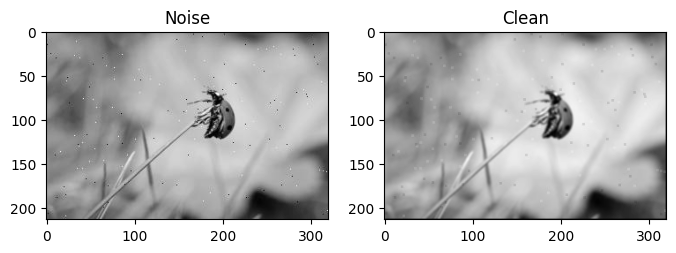

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def mean_filter(img: np.ndarray, kernel_size: int = 3):
    "平均化フィルタを適用する関数"
    if len(img.shape) == 3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape

    # ゼロ埋め
    pad = kernel_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    tmp_out = out.copy()

    # フィルタリング
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad + y, pad + x, c] = np.mean(tmp_out[y: y + kernel_size, x: x + kernel_size, c])

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = io.imread("imgs/noise/ladybug.jpeg")

plt.figure(figsize=(8, 4))

img_clean = mean_filter(img)
plt.subplot(1, 2, 1)
plt.title('Noise')
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title('Clean')
plt.imshow(img_clean, cmap="gray")

2. メディアンフィルタをノイズ画像に適用し，結果を表示せよ．フィルタのサイズは（３，３）とする．

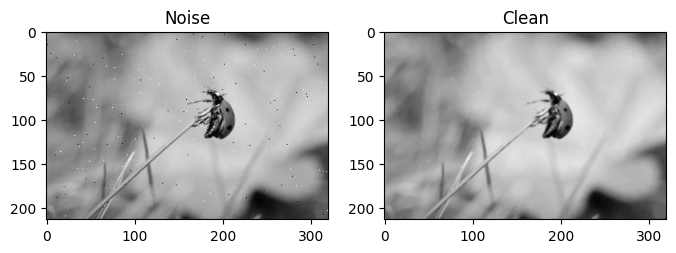

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def median_filter(img: np.ndarray, kernel_size: int=3):
	if len(img.shape) == 3:
		H, W, C = img.shape
	else:
		img = np.expand_dims(img, axis=-1)
		H, W, C = img.shape

		
	# ゼロ埋め
	pad = kernel_size // 2
	out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float32)
	out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

	tmp_out = out.copy()

	# フィルタリング
	for y in range(H):
		for x in range(W):
			for c in range(C):
				out[pad + y, pad + x, c] = np.median(tmp_out[y: y + kernel_size, x: x + kernel_size, c])

	out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

	return out

img = io.imread("imgs/noise/ladybug.jpeg")

plt.figure(figsize=(8, 4))

img_clean = median_filter(img)
plt.subplot(1, 2, 1)
plt.title('Noise')
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title('Clean')
plt.imshow(img_clean, cmap="gray")

3. 平均化とメディアンフィルタのサイズを（５，５）にせよ．（３，３）と（５，５）の結果を比較せよ．

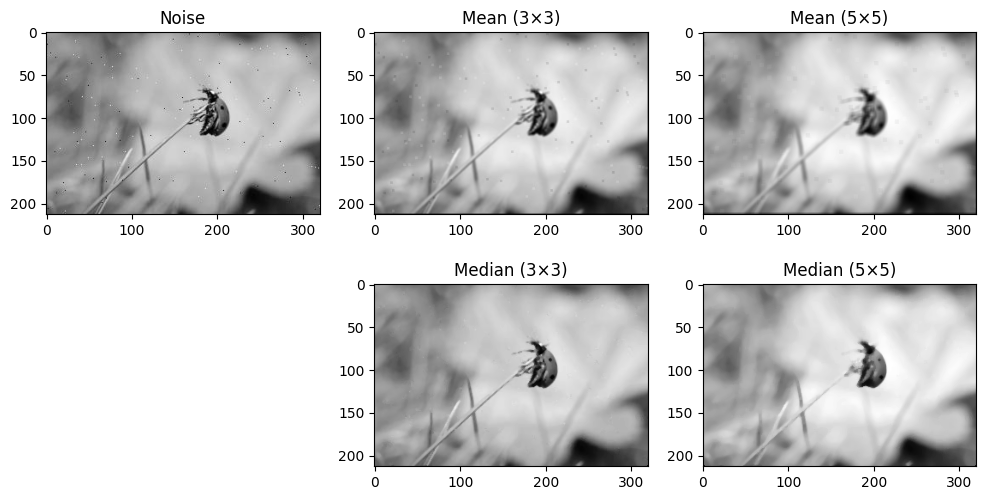

In [4]:
img = io.imread("imgs/noise/ladybug.jpeg")

plt.figure(figsize=(12, 6))

img_clean = mean_filter(img)
plt.subplot(2, 3, 1)
plt.title('Noise')
plt.imshow(img, cmap="gray")

img_mean_3 = mean_filter(img, kernel_size=3)
plt.subplot(2, 3, 2)
plt.title('Mean (3×3)')
plt.imshow(img_mean_3, cmap="gray")

img_mean_5 = mean_filter(img, kernel_size=5)
plt.subplot(2, 3, 3)
plt.title('Mean (5×5)')
plt.imshow(img_mean_5, cmap="gray")

img_median_3 = median_filter(img, kernel_size=3)
plt.subplot(2, 3, 5)
plt.title('Median (3×3)')
plt.imshow(img_median_3, cmap="gray")

img_median_5 = median_filter(img, kernel_size=5)
plt.subplot(2, 3, 6)
plt.title('Median (5×5)')
plt.imshow(img_median_5, cmap="gray")

4. 平均化とメディアンフィルタのサイズを（N，N）にせよ．（３，３）と（N，N）の結果を比較せよ．

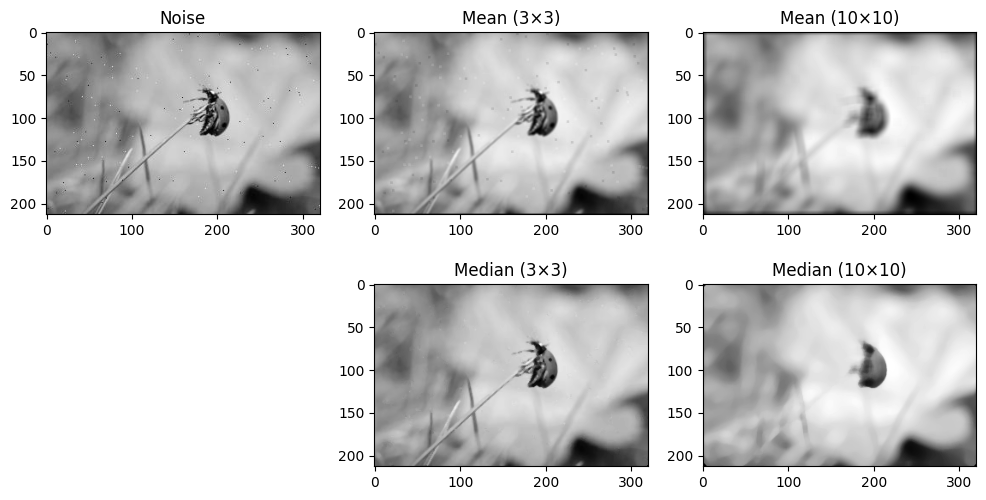

In [8]:
img = io.imread("imgs/noise/ladybug.jpeg")

plt.figure(figsize=(12, 6))

img_clean = mean_filter(img)
plt.subplot(2, 3, 1)
plt.title('Noise')
plt.imshow(img, cmap="gray")

n = 10

img_mean_3 = mean_filter(img, kernel_size=3)
plt.subplot(2, 3, 2)
plt.title('Mean (3×3)')
plt.imshow(img_mean_3, cmap="gray")

img_mean_n = mean_filter(img, kernel_size=n)
plt.subplot(2, 3, 3)
plt.title(f'Mean ({n}×{n})')
plt.imshow(img_mean_n, cmap="gray")

img_median_3 = median_filter(img, kernel_size=3)
plt.subplot(2, 3, 5)
plt.title('Median (3×3)')
plt.imshow(img_median_3, cmap="gray")

img_median_n = median_filter(img, kernel_size=n)
plt.subplot(2, 3, 6)
plt.title(f'Median ({n}×{n})')
plt.imshow(img_median_n, cmap="gray")